# Analyze traffic accident data to identify patterns related to road conditions, weather and time of day. visualize accident hotspots and contributing factors
dataset: https://www.kaggle.com/code/harshalbhamare/us-accident-eda

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [11]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/PRODIGY Internship/PRODIGY_DS_05/US_Accidents_Dec21_updated.csv')

# Overview of the data
print("Dataset shape:", df.shape)
print(df.columns)

Dataset shape: (2845342, 47)
Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


##  1. Time of Day Analysis

<ipython-input-12-c256a780b0e2>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




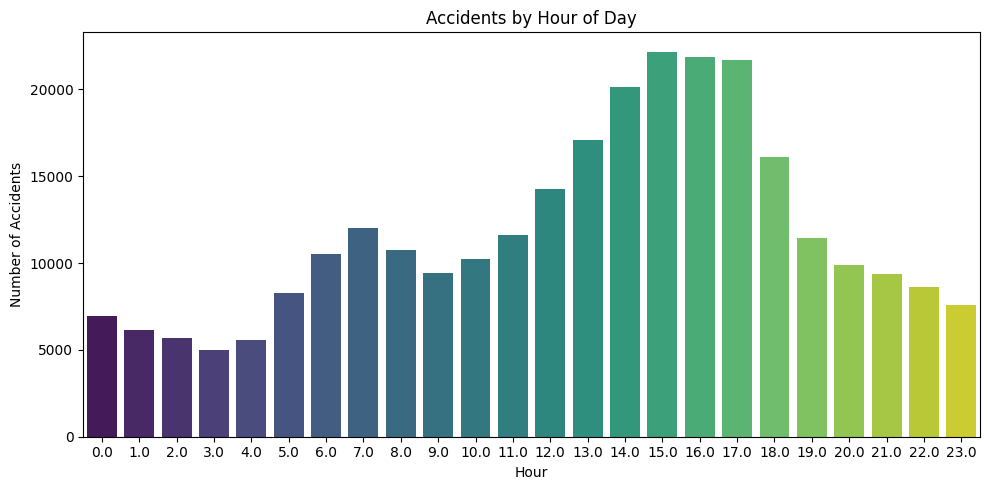

In [12]:
# Convert 'Start_Time' to datetime, handling nanoseconds
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Extract hour
df['Hour'] = df['Start_Time'].dt.hour

# Plot accident frequency by hour
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

##  2. Weather Conditions

<ipython-input-13-df4f8c26413c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




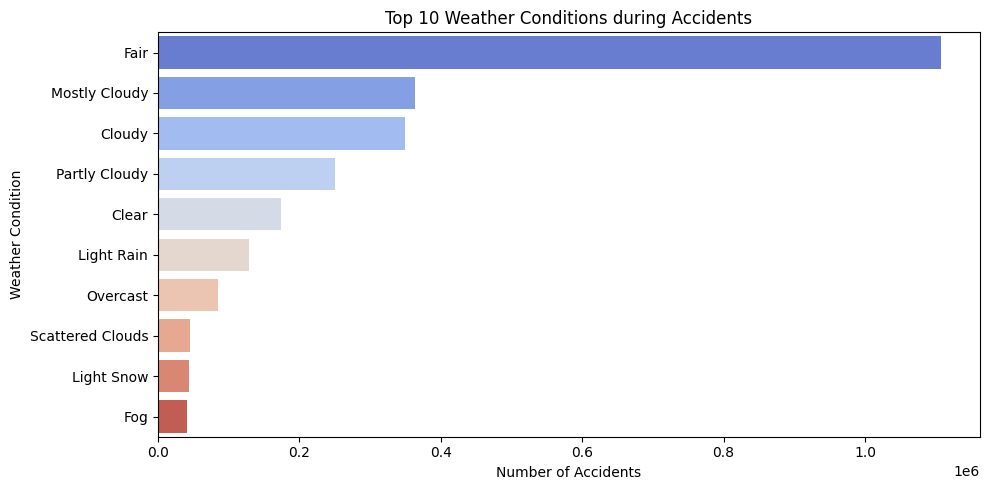

In [13]:
weather_counts = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette='coolwarm')
plt.title('Top 10 Weather Conditions during Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

## 3. Road Conditions

<ipython-input-14-fd9f35c24b03>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




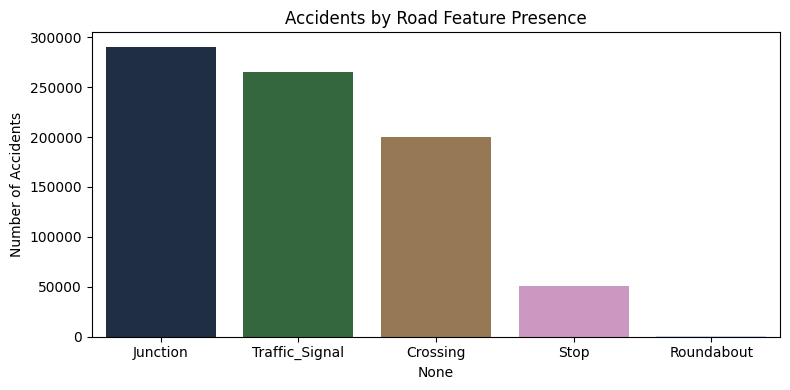

In [14]:
road_features = ['Crossing', 'Junction', 'Traffic_Signal', 'Stop', 'Roundabout']
road_stats = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=road_stats.index, y=road_stats.values, palette='cubehelix')
plt.title('Accidents by Road Feature Presence')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

## 4. Accident Hotspots (Map)

In [15]:
# Set the renderer for Google Colab
pio.renderers.default = 'colab'

# Sample 10,000 rows with valid coordinates
geo_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create density map
fig = px.density_mapbox(
    geo_df, lat='Start_Lat', lon='Start_Lng',
    radius=5,
    center=dict(lat=39.8283, lon=-98.5795),  # Center of US
    zoom=3,
    mapbox_style='open-street-map',  # No token required
    title='Accident Density Hotspots in the US'
)

fig.show()


## 5. Accidents by State

<ipython-input-16-a947b478ce74>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




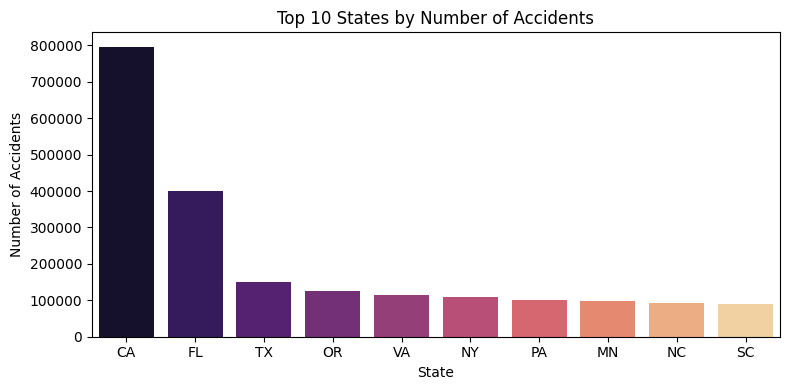

In [16]:
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_states.index, y=top_states.values, palette='magma')
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### 🔍 Key Insights You’ll Uncover

• Time of Day: Morning and evening rush hours have the highest accident rates.

• Weather: Most accidents occur in clear weather, not during storms.

• Road Features: Junctions and missing traffic signals are frequent accident spots.

• Hotspots: Accidents cluster around big cities and coasts.

• Top States: California, Texas, and Florida lead in accident numbers.

